In this lab, we will be collecting data, but due to various factors, we will have some extraneous measurements before and after that we'll need to cut out


In [ ]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


Read the example file.



In [ ]:
# numpy has a function that helps to read data files so we import it
import numpy as np

# Read in data using np.loadtxt. It takes in two inputs, the path to the file and a delimiter. The delimiter in this case is ',' since it is a csv file.
# We used skiprows = 1 to skip the first row of the csv file which contained the column headers and the units. 
# Your data will have two columns - elapsed time and ultrasound distance
read_in_array = np.loadtxt('/content/drive/MyDrive/2021-2022/22Winter/4AL/Python References/1.27 Freefall/Distance5.txt',skiprows=1,delimiter=',')

# Data processing (example)

Below we separate out the data. For this example, we will not be doing any conversions, but for your reports, you will need to convert these numbers into real units


In [ ]:
# This dataset has two columns
# Take all of the elements in the 0th column to create your x-axis array
time = read_in_array[:,0]

# We create an array to store the positions

position = read_in_array[:,1]


Let's look at the raw data.

Text(0, 0.5, 'Position (arbitrary units)')

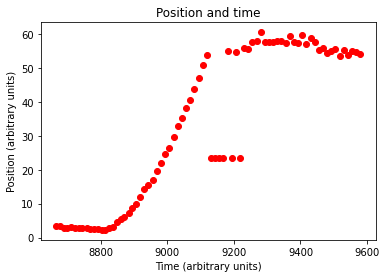

In [ ]:
# Import the module that will help you create a scatter plot
import matplotlib.pyplot as plt

# Make the scatter plot
plt.scatter(time,position,color="red")

# Provide a title to the plot
plt.title('Position and time')

# Label the x axis
plt.xlabel('Time (arbitrary units)')

# Label the y axis
plt.ylabel('Position (arbitrary units)')

There is some obvious noise in the beginning before the object is dropped and some noise after. 

The limits of the plot prevent us from doing any analysis, so we will index the array, selecting only the first 1000 elements with `array[beginning index:ending index]`. Below, we plot which positions we want to section out.



Text(0, 0.5, 'Position(arbitrary units)')

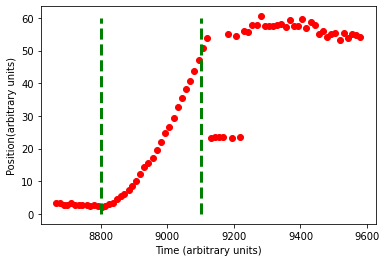

In [ ]:
# Create a scatter plot
plt.scatter(time,position,color="red")


# Plot a vertical line where this intersects with our acceleration
plt.vlines([8800,9100], 0, 60, color = 'green', linewidth = 3, linestyle = '--')

# Label the x axis
plt.xlabel('Time (arbitrary units)')

# Label the y axis
plt.ylabel('Position(arbitrary units)')

The x axis is in time units, not in index so in order to figure out what indices to put into `array[beginning index:ending index]`, let's plot it vs index number. We do this by only putting the position as the argument for a plt.plot function

Text(0, 0.5, 'Position')

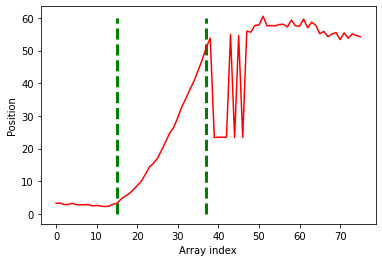

In [ ]:
# Create a scatter plot with only one argument
plt.plot(position,color="red")

# Plot a vertical line where this intersects with our acceleration
plt.vlines([15,37], 0, 60, color = 'green', linewidth = 3, linestyle = '--')

# Label the x axis
plt.xlabel('Array index')

# Label the y axis
plt.ylabel('Position')

We now see that the x axis gives the index position and we can look at where our desired portion is. Indicated above is the portion of the data when the object is falling, beginning from an array index of 67 and ending at an array index of 100. We can therefore cut out the relevant dataset with:

```
position_window = position[67:100]
time_window = time[67:100]
```

Note that we have to also index the time array. Plotting the windows below, we see that we have our desired portion of the data


Text(0, 0.5, 'Position (arbitrary units)')

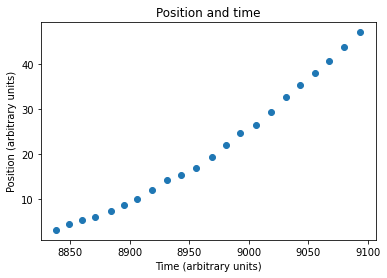

In [ ]:
position_window = position[15:37]
time_window = time[15:37]

plt.scatter(time_window, position_window)


# Provide a title to the plot
plt.title('Position and time')

# Label the x axis
plt.xlabel('Time (arbitrary units)')

# Label the y axis
plt.ylabel('Position (arbitrary units)')

One more thing that we'll want to do is to start our data at time = 0 rather than time = 8800. We can do this by subtracting the first element



```
time_window = time_window - time_window[0]
```



Text(0, 0.5, 'Position (arbitrary units)')

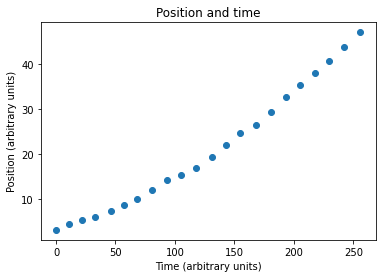

In [ ]:
time_window = time_window - time_window[0]

plt.scatter(time_window, position_window)


# Provide a title to the plot
plt.title('Position and time')

# Label the x axis
plt.xlabel('Time (arbitrary units)')

# Label the y axis
plt.ylabel('Position (arbitrary units)')

# Work with your own data now

Mount your Google drive

Fit an order 2 polynomial using np.polyfit(). Plot the time vs position raw data as a scatter plot as well as the best fit curve as a continuous plot. 

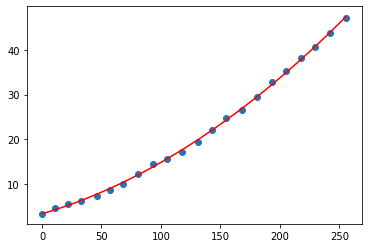

In [ ]:
# Scatter plot of new position vs time arrays


plt.scatter(time_window, position_window)

# Create array to store results of polyfit
polyfit = np.polyfit(time_window,position_window,2)
# Plot of best fit curve
quadraticmodel = polyfit[2] + time_window * polyfit[1] + time_window**2.0 * polyfit[0]
plt.plot(time_window,quadraticmodel, color = 'red', label = 'Best Fit')
# Create axes labels, legends and title


Print out the value of g that you obtained from polyfit

In [ ]:
# Print value of g
print('The coefficient of the quadratic term in the best fit model is ' + str(np.around(polyfit[0],6)))

# Convert centimeters to meters and convert milliseconds to seconds:

print('Based on the data, the value of g is ' + str(np.around(10000*(2*polyfit[0]),3)) + ' m/s^2.')

The coefficient of the quadratic term in the best fit model is 0.000371
Based on the data, the value of g is 7.419 m/s^2.
